# World Happiness Analysis


In [132]:
from src.dataset import HappinessDataset, MarriageDataset
import logging

In [133]:
# logging configuration
logging.basicConfig(
    level=logging.INFO,
    format="%(name)s:%(lineno)s [%(levelname)s]: %(message)s",
)

In [134]:
DATA = HappinessDataset.from_kaggle()

src.dataset:73 [INFO]: Loaded data for years: ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [135]:
CHECK_MARK = "\u2705"
CROSS_MARK = "\u274C"

for twenty_xy_str in DATA.get_years():
    twenty_xy = int(twenty_xy_str)
    xy = twenty_xy - 2000

    assert (
        DATA[twenty_xy] is DATA[xy]
    ), f"{CROSS_MARK} failed at year {twenty_xy}"

    print(f"{CHECK_MARK} {twenty_xy=} and {xy=} have the same df. :)")

✅ twenty_xy=2015 and xy=15 have the same df. :)
✅ twenty_xy=2016 and xy=16 have the same df. :)
✅ twenty_xy=2017 and xy=17 have the same df. :)
✅ twenty_xy=2018 and xy=18 have the same df. :)
✅ twenty_xy=2019 and xy=19 have the same df. :)
✅ twenty_xy=2020 and xy=20 have the same df. :)
✅ twenty_xy=2021 and xy=21 have the same df. :)
✅ twenty_xy=2022 and xy=22 have the same df. :)
✅ twenty_xy=2023 and xy=23 have the same df. :)


In [136]:
data_2023 = DATA[2023]

In [137]:

# Sort the DataFrame by happiness_score in descending order
top_10_happiest = data_2023.sort_values(by='happiness_score', ascending=False).head(5)
top_10_unhappiest = data_2023.sort_values(by='happiness_score', ascending=False)[-5:]


# Reset index for clean plotting
top_10_happiest = top_10_happiest.reset_index(drop=True)
top_10_unhappiest = top_10_unhappiest.reset_index(drop=True)

top_20_combined = pd.concat([top_10_happiest, top_10_unhappiest], axis=0)

# Reset index for clean plotting
top_20_combined = top_20_combined.reset_index(drop=True)

# Concat the top 10 happiest and top 10 unhappiest countries
top_10_happiest = top_10_happiest[['country', 'happiness_score']]
top_10_unhappiest = top_10_unhappiest[['country', 'happiness_score']]


# Display the top 10 happiest countries
print(top_10_happiest[['country', 'happiness_score']])


       country  happiness_score
0      Finland            7.804
1      Denmark            7.586
2      Iceland            7.530
3       Israel            7.473
4  Netherlands            7.403


In [138]:
import plotly.express as px

# Create a horizontal bar chart
fig = px.bar(
    top_20_combined,
    x='happiness_score',
    y='country',
    orientation='h',
    title='Top Happiest Countries in 2023',
    labels={'happiness_score': 'Happiness Score', 'country': 'Country'},
    color='happiness_score',
    color_continuous_scale='Viridis',
    text='happiness_score'  # Display the score on the bars
)

# Update layout for better aesthetics
fig.update_layout(
    yaxis=dict(autorange="reversed"),  # Highest scores on top
    xaxis=dict(showgrid=True),
    template='plotly_white'
)

# Customize text appearance
fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')

# Show the figure
fig.show()


In [147]:
import pandas as pd
import plotly.express as px

# Sample DataFrame
data_clean = pd.DataFrame({
    'country': ['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
                'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria'],
    'happiness_score': [7.8, 7.6, 7.6, 7.5, 7.4, 7.4, 7.3, 7.3, 7.3, 7.2],
    'gdp_per_capita': [45000, 40000, 48000, 42000, 39000, 50000, 38000, 60000, 35000, 37000]
})

fig = px.scatter(
    data_2023,
    x='gdp_per_capita',
    y='happiness_score',
    hover_name='country',
    color='happiness_score',
    title='GDP per Capita vs. Happiness Score',
    labels={
        'gdp_per_capita': 'GDP per Capita (USD)',
        'happiness_score': 'Happiness Score'
    },
    color_continuous_scale='Viridis',
    template='plotly_white'
)

# Update layout to customize marker size
fig.update_traces(marker=dict(size=10))  # Adjust the size as needed

fig.update_layout(
    legend_title_text='Happiness Score',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()

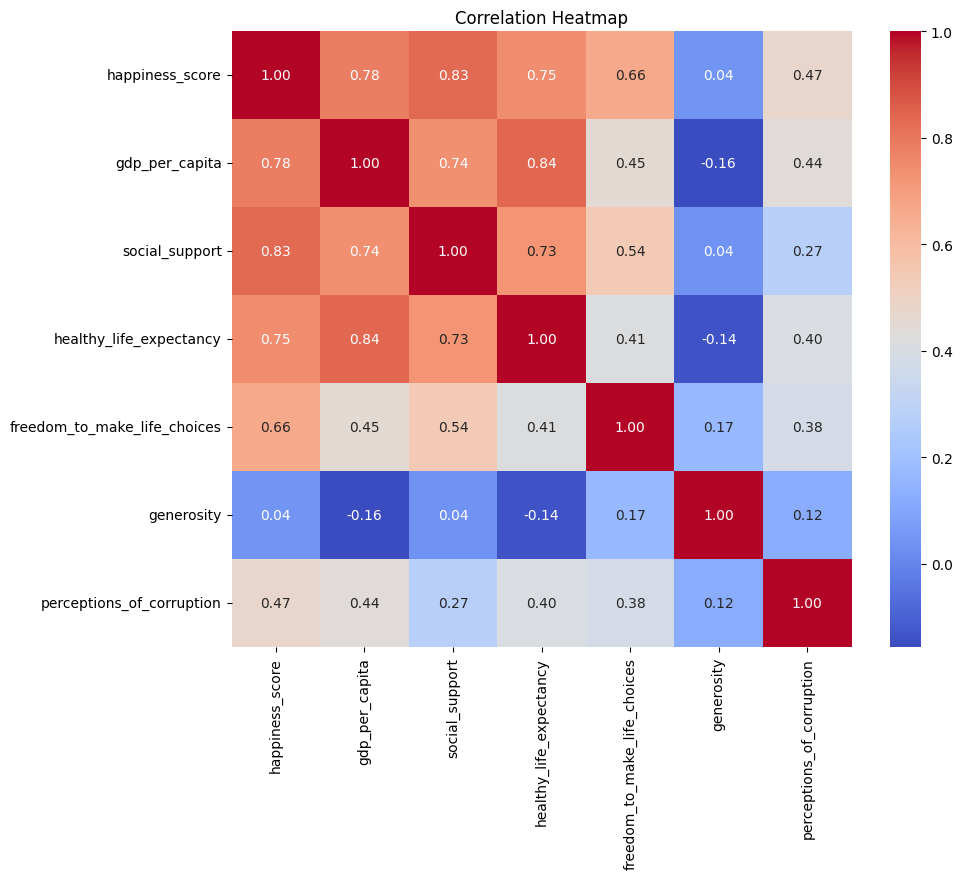

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_2023 is your DataFrame
# Select the specified columns
selected_columns = [
    'happiness_score', 'gdp_per_capita', 'social_support', 
    'healthy_life_expectancy', 'freedom_to_make_life_choices', 
    'generosity', 'perceptions_of_corruption'
]
vals = data_2023[selected_columns]

# Calculate the correlation matrix
correlation_matrix = vals.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: For interactive plots
# import plotly.express as px

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")


In [91]:
# Sort from lowest to highest by gdp_per_capita
data_2023_ = data_2023.sort_values(by='gdp_per_capita')
data_2023_.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
87,Venezuela,Latin America and Caribbean,5.211,0.000,1.257,0.341,0.369,0.205,0.084
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
108,Niger,Sub-Saharan Africa,4.501,0.561,0.628,0.137,0.540,0.154,0.140
96,Mozambique,Sub-Saharan Africa,4.954,0.570,0.885,0.000,0.625,0.161,0.192
113,Chad,Sub-Saharan Africa,4.397,0.622,0.962,0.043,0.393,0.255,0.088


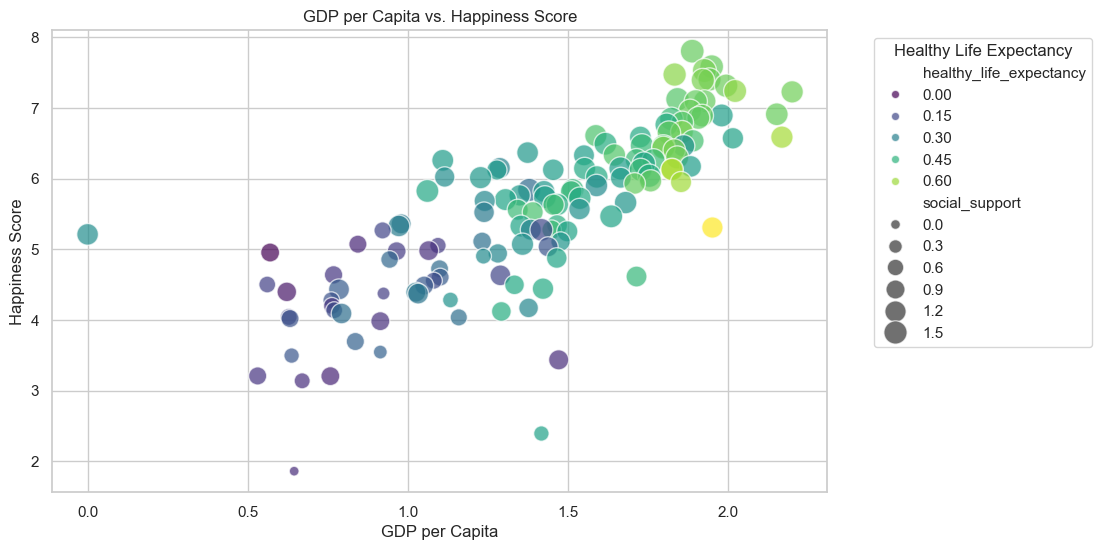

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_2023, x='gdp_per_capita', y='happiness_score', hue='healthy_life_expectancy', size='social_support', palette='viridis', sizes=(50, 300), alpha=0.7)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Healthy Life Expectancy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


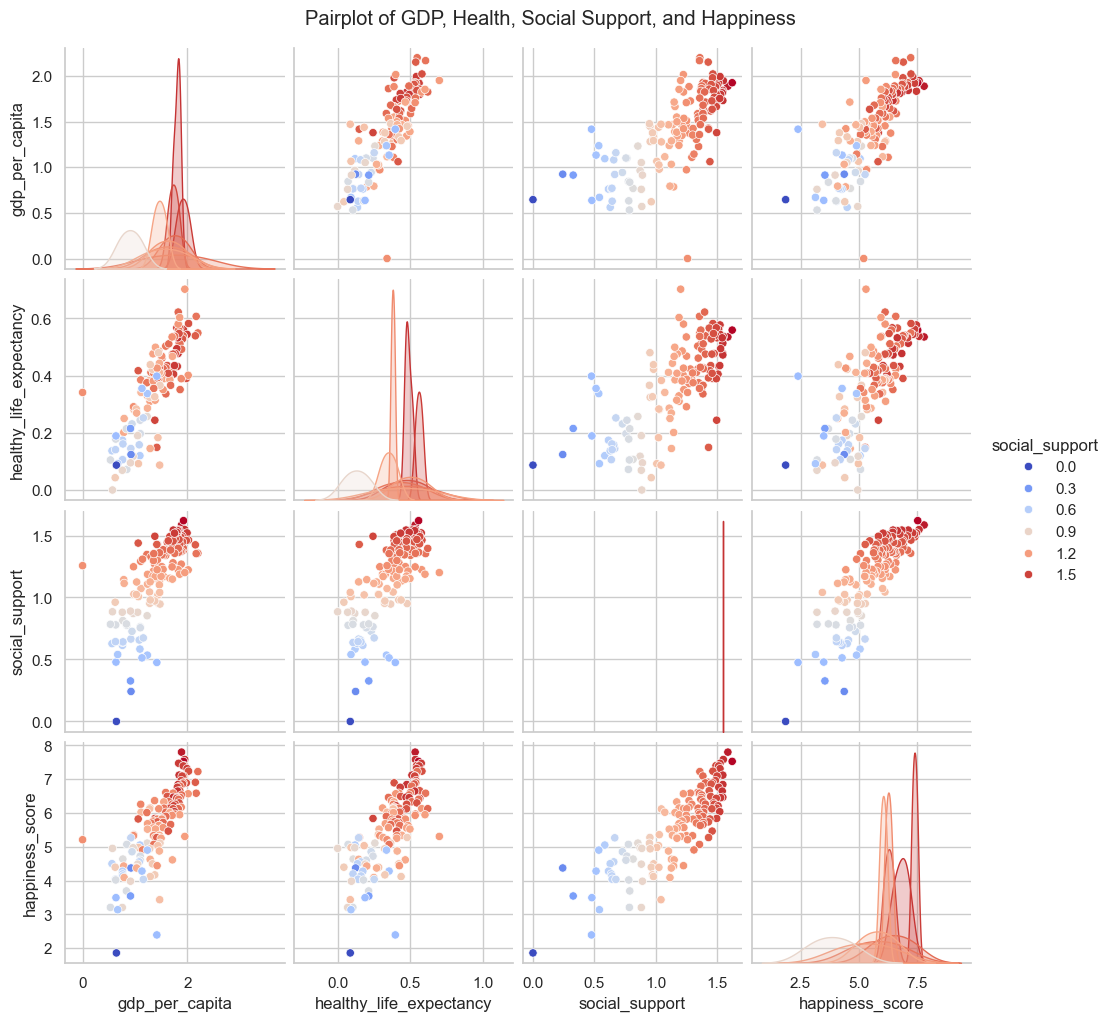

In [92]:
sns.pairplot(data_2023, vars=['gdp_per_capita', 'healthy_life_expectancy', 'social_support', 'happiness_score'], hue='social_support', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of GDP, Health, Social Support, and Happiness', y=1.02)
plt.show()


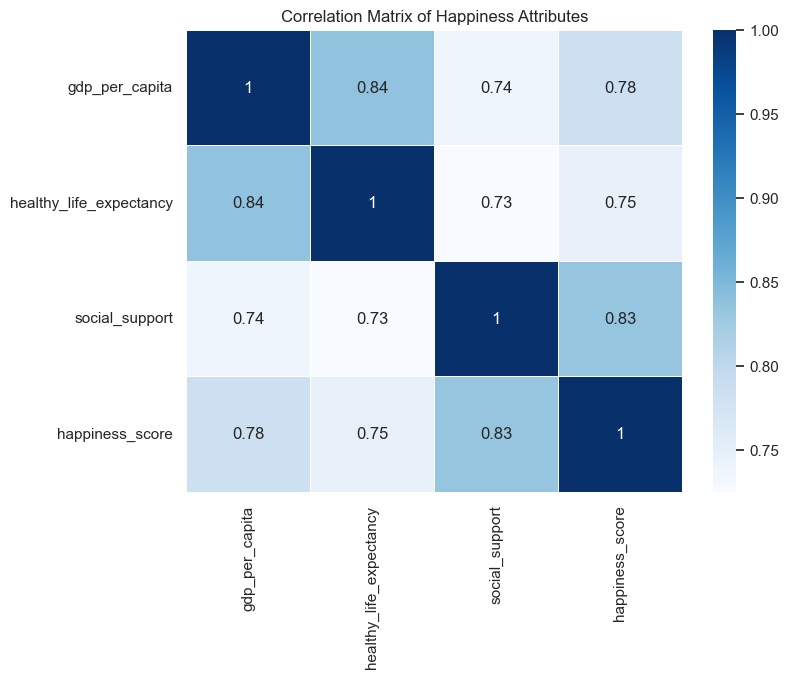

In [93]:
plt.figure(figsize=(8, 6))
corr_matrix = data_2023[['gdp_per_capita', 'healthy_life_expectancy', 'social_support', 'happiness_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix of Happiness Attributes')
plt.show()


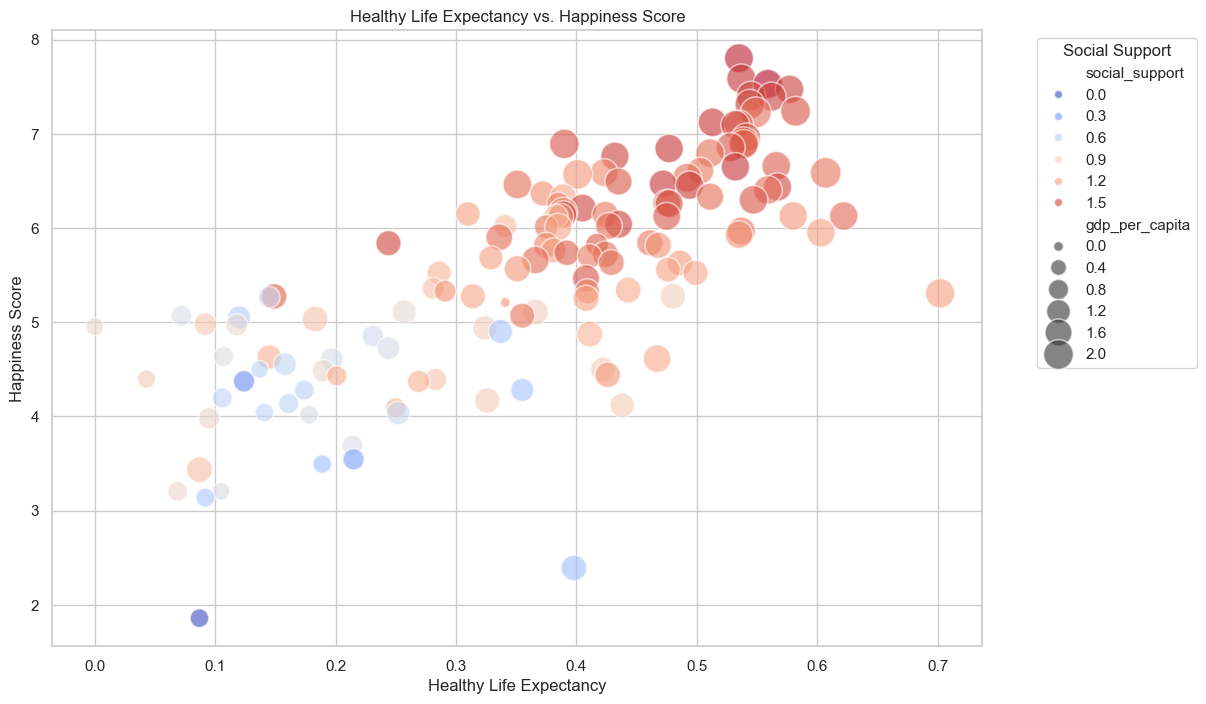

In [94]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_2023, x='healthy_life_expectancy', y='happiness_score', size='gdp_per_capita', hue='social_support', palette='coolwarm', alpha=0.6, sizes=(50, 500))
plt.title('Healthy Life Expectancy vs. Happiness Score')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.legend(title='Social Support', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [95]:
import statsmodels.api as sm

# Define the independent variables and add a constant
X = data_2023[['gdp_per_capita', 'healthy_life_expectancy', 'social_support']]
X = sm.add_constant(X)

# Define the dependent variable
y = data_2023['happiness_score']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


MissingDataError: exog contains inf or nans

Original rows: 137, Rows after dropping NaNs: 136
       country  cluster
0      Finland      2.0
1      Denmark      2.0
2      Iceland      2.0
3       Israel      2.0
4  Netherlands      2.0


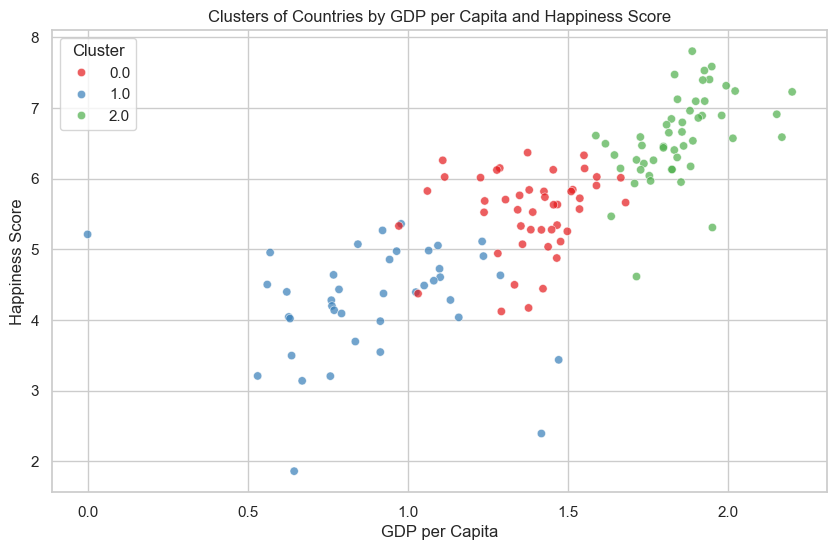

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming data_2023 is already loaded as a pandas DataFrame
# Example:
# data_2023 = pd.read_csv('path_to_your_data.csv')

# Step 1: Select relevant features
features = data_2023[['gdp_per_capita', 'healthy_life_expectancy', 'social_support', 'happiness_score']]

# Step 2: Handle missing values by dropping rows with any NaNs
features_clean = features.dropna()

# Optional: Check how many rows were dropped
print(f"Original rows: {len(data_2023)}, Rows after dropping NaNs: {len(features_clean)}")

# Step 3: Scale the features (excluding 'happiness_score' if it's the target variable)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_clean[['gdp_per_capita', 'healthy_life_expectancy', 'social_support']])

# Step 4: Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Step 5: Assign cluster labels back to the original DataFrame
# Use the index from features_clean to align clusters correctly
data_2023.loc[features_clean.index, 'cluster'] = clusters

# Verify the assignment
print(data_2023[['country', 'cluster']].head())

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_2023,
    x='gdp_per_capita',
    y='happiness_score',
    hue='cluster',
    palette='Set1',
    alpha=0.7
)
plt.title('Clusters of Countries by GDP per Capita and Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Cluster')
plt.show()


In [101]:
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

data_2023['iso_alpha'] = data_2023['country'].apply(get_iso3)

In [102]:
import plotly.express as px

# Create a choropleth map for Happiness Score
fig = px.choropleth(
    data_2023,
    locations='iso_alpha',
    color='happiness_score',
    hover_name='country',
    color_continuous_scale='Viridis',
    title='Global Happiness Scores by Country',
    labels={'happiness_score': 'Happiness Score'}
)

fig.show()


In [103]:
# Create an interactive scatter geo plot
fig = px.scatter_geo(
    data_2023,
    locations='iso_alpha',
    hover_name='country',
    size='gdp_per_capita',
    color='happiness_score',
    projection='natural earth',
    title='Happiness vs. GDP per Capita',
    labels={
        'gdp_per_capita': 'GDP per Capita',
        'happiness_score': 'Happiness Score'
    },
    color_continuous_scale='Blues',
    size_max=50
)

fig.update_layout(legend_title_text='Happiness Score')
fig.show()


In [104]:
# Create categories for GDP per capita and Social Support
data_2023['gdp_category'] = pd.qcut(data_2023['gdp_per_capita'], q=3, labels=['Low GDP', 'Medium GDP', 'High GDP'])
data_2023['support_category'] = pd.qcut(data_2023['social_support'], q=3, labels=['Low Support', 'Medium Support', 'High Support'])

# Combine the two categories
data_2023['bivariate_category'] = data_2023['gdp_category'].astype(str) + ' & ' + data_2023['support_category'].astype(str)

# Define a color scale for the combined categories
bivariate_color_scale = [
    # Low GDP & Low Support
    [0.0, "rgb(242,240,247)"],
    [0.16, "rgb(242,240,247)"],
    
    # Medium GDP & Low Support
    [0.17, "rgb(218,218,235)"],
    [0.33, "rgb(218,218,235)"],
    
    # High GDP & Low Support
    [0.34, "rgb(188,189,220)"],
    [0.50, "rgb(188,189,220)"],
    
    # Low GDP & Medium Support
    [0.51, "rgb(158,154,200)"],
    [0.67, "rgb(158,154,200)"],
    
    # Medium GDP & Medium Support
    [0.68, "rgb(128,125,186)"],
    [0.84, "rgb(128,125,186)"],
    
    # High GDP & Medium Support
    [0.85, "rgb(106,81,163)"],
    [1.0, "rgb(106,81,163)"]
]

# Create the bivariate choropleth map
fig = px.choropleth(
    data_2023,
    locations='iso_alpha',
    color='bivariate_category',
    hover_name='country',
    title='Bivariate Choropleth: GDP per Capita & Social Support',
    color_discrete_sequence=['rgb(242,240,247)', 'rgb(218,218,235)', 'rgb(188,189,220)',
                             'rgb(158,154,200)', 'rgb(128,125,186)', 'rgb(106,81,163)']
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="GDP & Support",
        tickvals=["Low GDP & Low Support", "Medium GDP & Medium Support", "High GDP & High Support"],
        ticktext=["Low GDP & Low Support", "Medium GDP & Medium Support", "High GDP & High Support"]
    )
)

fig.show()


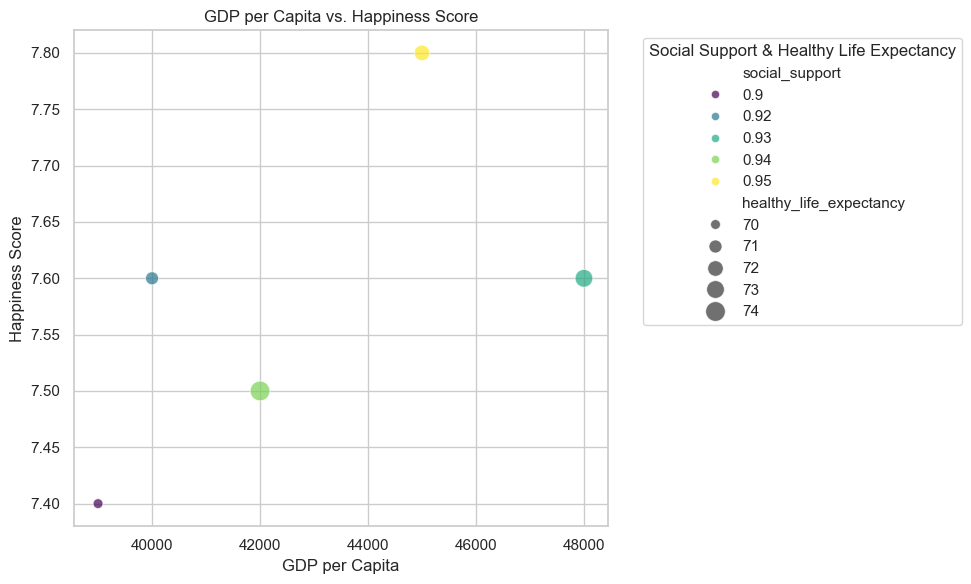

/var/folders/st/q8k3m57x71bbmhhvc1l_t3vh0000gn/T/ipykernel_92862/3604798528.py:86: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/st/q8k3m57x71bbmhhvc1l_t3vh0000gn/T/ipykernel_92862/3604798528.py:87: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/st/q8k3m57x71bbmhhvc1l_t3vh0000gn/T/ipykernel_92862/3604798528.py:90: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry

# Load your dataframe
# data_2023 = pd.read_csv('path_to_your_data.csv')  # Uncomment and modify if needed

# Sample DataFrame for demonstration
data_2023 = pd.DataFrame({
    'country': ['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Country X'],
    'happiness_score': [7.8, 7.6, 7.6, 7.5, 7.4, 5.0],
    'gdp_per_capita': [45000, 40000, 48000, 42000, 39000, 15000],
    'healthy_life_expectancy': [72, 71, 73, 74, 70, 60],
    'social_support': [0.95, 0.92, 0.93, 0.94, 0.90, 0.50]
})

# Function to get ISO Alpha-3 codes
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

# Add ISO codes to the DataFrame
data_2023['iso_alpha'] = data_2023['country'].apply(get_iso3)

# Remove rows without ISO codes
data_map = data_2023.dropna(subset=['iso_alpha'])

# 1. Scatter Plot: GDP per Capita vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_map, x='gdp_per_capita', y='happiness_score', hue='social_support', size='healthy_life_expectancy', palette='viridis', sizes=(50, 200), alpha=0.7)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Social Support & Healthy Life Expectancy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Choropleth Map: Happiness Score by Country
fig1 = px.choropleth(
    data_map,
    locations='iso_alpha',
    color='happiness_score',
    hover_name='country',
    color_continuous_scale='Viridis',
    title='Global Happiness Scores by Country',
    labels={'happiness_score': 'Happiness Score'}
)

fig1.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title="Happiness Score")
)

fig1.show()

# 3. Interactive Scatter Geo Plot: Happiness vs. GDP per Capita
fig2 = px.scatter_geo(
    data_map,
    locations='iso_alpha',
    hover_name='country',
    size='gdp_per_capita',
    color='happiness_score',
    projection='natural earth',
    title='Happiness Score vs. GDP per Capita',
    labels={
        'gdp_per_capita': 'GDP per Capita',
        'happiness_score': 'Happiness Score'
    },
    color_continuous_scale='Blues',
    size_max=60
)

fig2.update_layout(
    legend_title_text='Happiness Score',
    coloraxis_colorbar=dict(title="Happiness Score")
)

fig2.show()

# 4. Bivariate Choropleth Map: GDP per Capita & Social Support
# Create categories for GDP per capita and Social Support
data_map['gdp_category'] = pd.qcut(data_map['gdp_per_capita'], q=3, labels=['Low GDP', 'Medium GDP', 'High GDP'])
data_map['support_category'] = pd.qcut(data_map['social_support'], q=3, labels=['Low Support', 'Medium Support', 'High Support'])

# Combine the two categories
data_map['bivariate_category'] = data_map['gdp_category'].astype(str) + ' & ' + data_map['support_category'].astype(str)

# Define a color mapping for the combined categories
color_mapping = {
    'Low GDP & Low Support': 'rgb(242,240,247)',
    'Low GDP & Medium Support': 'rgb(218,218,235)',
    'Low GDP & High Support': 'rgb(188,189,220)',
    'Medium GDP & Low Support': 'rgb(158,154,200)',
    'Medium GDP & Medium Support': 'rgb(128,125,186)',
    'Medium GDP & High Support': 'rgb(106,81,163)',
    'High GDP & Low Support': 'rgb(84,39,143)',
    'High GDP & Medium Support': 'rgb(63,0,125)',
    'High GDP & High Support': 'rgb(48,0,75)'
}

# Assign colors based on the combined category
data_map['bivariate_color'] = data_map['bivariate_category'].map(color_mapping)

# Bivariate Choropleth Map
fig3 = px.choropleth(
    data_map,
    locations='iso_alpha',
    color='bivariate_color',
    hover_name='country',
    title='Bivariate Choropleth: GDP per Capita & Social Support',
    labels={'bivariate_color': 'GDP & Support'},
)

fig3.update_traces(marker_line_width=0)

fig3.update_layout(
    coloraxis_showscale=False,
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    legend_title_text='GDP & Social Support'
)

fig3.show()


In [108]:
# Sort the DataFrame by happiness_score in descending order
top_10_happiest = data_2023.sort_values(by='happiness_score', ascending=False).head(10)

# Reset index for clean plotting
top_10_happiest = top_10_happiest.reset_index(drop=True)

# Display the top 10 happiest countries
print(top_10_happiest[['country', 'happiness_score']])


       country  happiness_score
0      Finland              7.8
1      Denmark              7.6
2  Switzerland              7.6
3      Iceland              7.5
4  Netherlands              7.4
5    Country X              5.0
